In [1]:
import pandas as pd 

In [2]:
#import shootings csv file to DataFrame
data = pd.read_csv('fatal-police-shootings-data.csv') 
data 

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,9147,2023-04-22,point,not,gun,Mesquite,Dallas,TX,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,False,False,NaN
8406,9149,2023-04-22,shoot,NaN,gun,West Jordan,Salt Lake,UT,40.593788,-111.969553,address,NaN,NaN,male,NaN,NaN,False,False,751
8407,9144,2023-04-23,NaN,NaN,undetermined,Pineville,Rapides,LA,31.207175,-92.149489,block,NaN,NaN,NaN,NaN,NaN,False,False,21677
8408,9153,2023-04-23,attack,not,unknown,Shreveport,Caddo,LA,32.435405,-93.783105,intersection,Joseph Dewayne Taylor,33.0,male,B,public_record,False,False,772


In [3]:
data.dtypes

id                              int64
date                           object
threat_type                    object
flee_status                    object
armed_with                     object
city                           object
county                         object
state                          object
latitude                      float64
longitude                     float64
location_precision             object
name                           object
age                           float64
gender                         object
race                           object
race_source                    object
was_mental_illness_related       bool
body_camera                      bool
agency_ids                     object
dtype: object

In [4]:
#dropping unnecessary columns
data_clean = data.drop(columns=['latitude', 'longitude', 'location_precision', 'threat_type', 'flee_status', 
                                'race_source', 'was_mental_illness_related', 'body_camera'])
data_clean

,id,date,armed_with,city,county,state,name,age,gender,race,agency_ids
0,3,2015-01-02,gun,Shelton,Mason,WA,Tim Elliot,53.0,male,A,73
1,4,2015-01-02,gun,Aloha,Washington,OR,Lewis Lee Lembke,47.0,male,W,70
2,5,2015-01-03,unarmed,Wichita,Sedgwick,KS,John Paul Quintero,23.0,male,H,238
3,8,2015-01-04,replica,San Francisco,San Francisco,CA,Matthew Hoffman,32.0,male,W,196
4,9,2015-01-04,other,Evans,Weld,CO,Michael Rodriguez,39.0,male,H,473
...,...,...,...,...,...,...,...,...,...,...,...
8405,9147,2023-04-22,gun,Mesquite,Dallas,TX,NaN,NaN,male,NaN,NaN
8406,9149,2023-04-22,gun,West Jordan,Salt Lake,UT,NaN,NaN,male,NaN,751
8407,9144,2023-04-23,undetermined,Pineville,Rapides,LA,NaN,NaN,NaN,NaN,21677
8408,9153,2023-04-23,unknown,Shreveport,Caddo,LA,Joseph Dewayne Taylor,33.0,male,B,772


In [5]:
pd.unique(data_clean['gender'])

array(['male', 'female', nan, 'non-binary'], dtype=object)

In [6]:
pd.unique(data_clean['race'])

array(['A', 'W', 'H', 'B', 'O', nan, 'N', 'B;H'], dtype=object)

In [7]:
#dropped na values from DataFrame
data_clean.dropna()

,id,date,armed_with,city,county,state,name,age,gender,race,agency_ids
0,3,2015-01-02,gun,Shelton,Mason,WA,Tim Elliot,53.0,male,A,73
1,4,2015-01-02,gun,Aloha,Washington,OR,Lewis Lee Lembke,47.0,male,W,70
2,5,2015-01-03,unarmed,Wichita,Sedgwick,KS,John Paul Quintero,23.0,male,H,238
3,8,2015-01-04,replica,San Francisco,San Francisco,CA,Matthew Hoffman,32.0,male,W,196
4,9,2015-01-04,other,Evans,Weld,CO,Michael Rodriguez,39.0,male,H,473
...,...,...,...,...,...,...,...,...,...,...,...
8397,9142,2023-04-19,gun,Bristol,Sullivan,TN,Casey Eric Crowley,48.0,male,W,2408
8398,9151,2023-04-19,gun,Kansas City,Jackson,MO,Reginald E. Byers Jr.,43.0,male,B,201
8399,9152,2023-04-20,gun,Indianapolis,Marion,IN,Daniel Yefter Ghebrehiwet,46.0,male,B,13886
8408,9153,2023-04-23,unknown,Shreveport,Caddo,LA,Joseph Dewayne Taylor,33.0,male,B,772


In [8]:
#set datatypes for multiple columns, most notably the date column
data_clean.astype({'age': 'Int64',
                   'id' : 'object',
                   'gender': 'category',
                   'race': 'category',
                  'date': 'datetime64[ns]'}).dtypes

id                    object
date          datetime64[ns]
armed_with            object
city                  object
county                object
state                 object
name                  object
age                    Int64
gender              category
race                category
agency_ids            object
dtype: object

In [9]:
#set name as the index for the DataFrame
shootings_df = data_clean.set_index('id')
shootings_df

,date,armed_with,city,county,state,name,age,gender,race,agency_ids
id,,,,,,,,,,
3,2015-01-02,gun,Shelton,Mason,WA,Tim Elliot,53.0,male,A,73
4,2015-01-02,gun,Aloha,Washington,OR,Lewis Lee Lembke,47.0,male,W,70
5,2015-01-03,unarmed,Wichita,Sedgwick,KS,John Paul Quintero,23.0,male,H,238
8,2015-01-04,replica,San Francisco,San Francisco,CA,Matthew Hoffman,32.0,male,W,196
9,2015-01-04,other,Evans,Weld,CO,Michael Rodriguez,39.0,male,H,473
...,...,...,...,...,...,...,...,...,...,...
9147,2023-04-22,gun,Mesquite,Dallas,TX,NaN,NaN,male,NaN,NaN
9149,2023-04-22,gun,West Jordan,Salt Lake,UT,NaN,NaN,male,NaN,751
9144,2023-04-23,undetermined,Pineville,Rapides,LA,NaN,NaN,NaN,NaN,21677


In [10]:
#Task 3, Q1
shootings_df.loc[1694]

date                2016-07-06
armed_with                 gun
city            Falcon Heights
county                  Ramsey
state                       MN
name          Philando Castile
age                       32.0
gender                    male
race                         B
agency_ids                1359
Name: 1694, dtype: object

In [11]:
#Task 3, Q2
mn_shootings = shootings_df.loc[shootings_df['state'] == 'MN'] 
mn_shootings

,date,armed_with,city,county,state,name,age,gender,race,agency_ids
id,,,,,,,,,,
49,2015-01-14,NaN,St. Paul,Ramsey,MN,Marcus Golden,24.0,male,B,63
60,2015-01-15,gun,Bloomington,Hennepin,MN,Quincy Reed Reindl,24.0,male,W,139
324,2015-01-26,gun,New Hope,Hennepin,MN,Raymond Kmetz,68.0,male,W,1953;109
212,2015-03-16,gun,St. Paul,Ramsey,MN,Justin Tolkinen,28.0,male,W,63
454,2015-05-08,NaN,Fridley,Anoka,MN,Sam Holmes,31.0,male,B,476
...,...,...,...,...,...,...,...,...,...,...
8744,2022-12-15,knife,New Auburn,Sibley,MN,Brent A. Alsleben,34.0,male,NaN,896
8947,2023-02-11,knife,St. Paul,Ramsey,MN,NaN,NaN,male,NaN,63
8975,2023-02-24,knife,Duluth,St. Louis,MN,Zachary Shogren,34.0,male,NaN,2376


In [12]:
#Task 3, Q3
race_df = shootings_df['race'].value_counts() 
race_df

race
W      3679
B      1939
H      1296
A       143
N       111
O        20
B;H       1
Name: count, dtype: int64

In [13]:
#Task 4, Q4
black_shootings = shootings_df.loc[shootings_df['race'] == 'B'] 
len(black_shootings) / len(shootings_df['race']) * 100

23.05588585017836

In [14]:
#Task 3, Q5
state_df = shootings_df['state'].value_counts() 
state_df

state
CA    1198
TX     771
FL     534
AZ     384
GA     318
CO     305
OH     240
NC     240
TN     234
OK     232
WA     228
MO     220
NM     178
PA     172
IL     170
LA     166
AL     160
IN     158
VA     154
NY     152
KY     150
MI     142
OR     137
NV     137
SC     131
WI     129
AR     115
MD     112
MS     109
UT     101
NJ      95
MN      92
KS      81
WV      80
ID      70
MA      57
MT      54
AK      54
IA      50
NE      41
HI      40
ME      34
SD      29
WY      28
DC      26
CT      23
NH      23
DE      19
ND      18
VT      13
RI       6
Name: count, dtype: int64

Text(0.5, 0, 'Race')

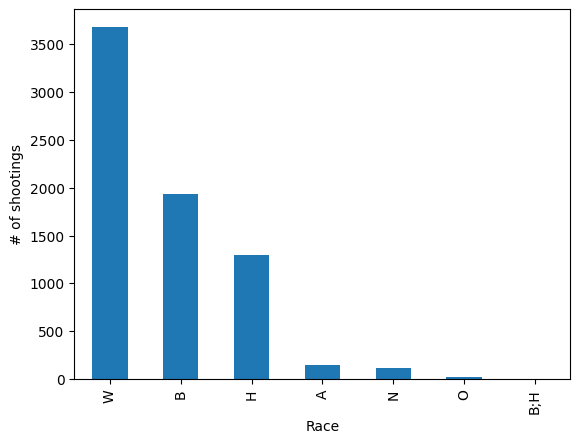

In [15]:
#Task 3, Q6A
import matplotlib.pyplot as plt 

race_df.plot(kind="bar") 
plt.ylabel("# of shootings") 
plt.xlabel("Race")

Text(0.5, 0, 'State')

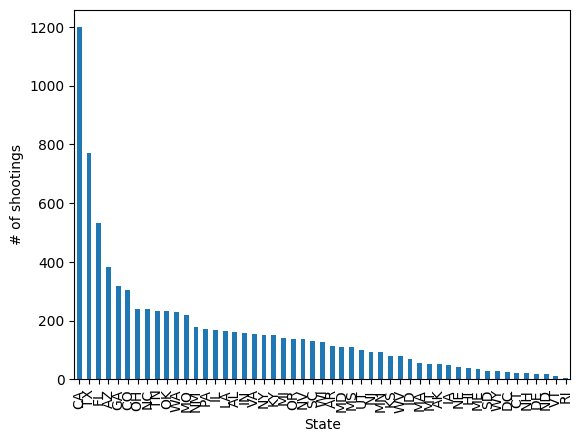

In [16]:
#Task 3, Q6B 
state_df.plot(kind="bar") 
plt.ylabel("# of shootings") 
plt.xlabel("State")

<Axes: ylabel='count'>

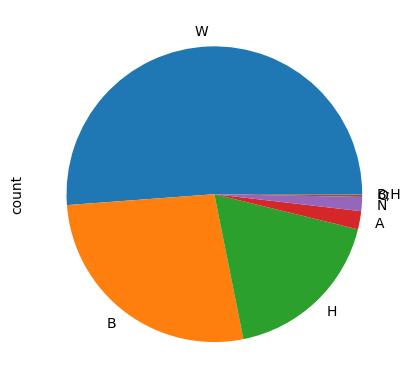

In [17]:
#Task 3, Q7
race_df.plot(kind="pie")

In [18]:
#filter shooting data for unarmed subjects
armed_df = shootings_df.loc[shootings_df['armed_with'].isnull()] 
armed_df

,date,armed_with,city,county,state,name,age,gender,race,agency_ids
id,,,,,,,,,,
29,2015-01-08,NaN,Huntley,Yellowstone,MT,Loren Simpson,28.0,male,W,254
49,2015-01-14,NaN,St. Paul,Ramsey,MN,Marcus Golden,24.0,male,B,63
50,2015-01-14,NaN,Franklin County,Franklin,MO,Michael Goebel,29.0,male,W,278
85,2015-01-20,NaN,Scottsdale,Maricopa,AZ,Dewayne Carr,42.0,male,B,510
101,2015-01-23,NaN,Fort Lauderdale,Broward,FL,Demaris Turner,29.0,male,B,148
...,...,...,...,...,...,...,...,...,...,...
7645,2021-09-16,NaN,Yazoo City,NaN,MS,Katrina Simpson,27.0,female,B,3254
7655,2022-01-25,NaN,Madison County,NaN,MO,Ronnie D. Walker,58.0,male,W,1264
7652,2022-01-28,NaN,Springfield,NaN,MO,Mitchell R. Hooe,28.0,male,NaN,350


In [19]:
armed_df.pivot_table(columns='race', aggfunc='count')

race,A,B,H,N,W
age,5,56,40,1,95
agency_ids,5,57,40,1,96
armed_with,0,0,0,0,0
city,5,57,40,1,96
county,5,53,37,1,79
date,5,57,40,1,96
gender,5,57,40,1,96
name,5,56,40,1,95
state,5,57,40,1,96


In [20]:
unarmed_shootings = armed_df.loc[armed_df['race'] == 'B'] 
len(unarmed_shootings) / len(armed_df['armed_with']) * 100

27.142857142857142

TypeError: 'value' must be an instance of str or bytes, not a float

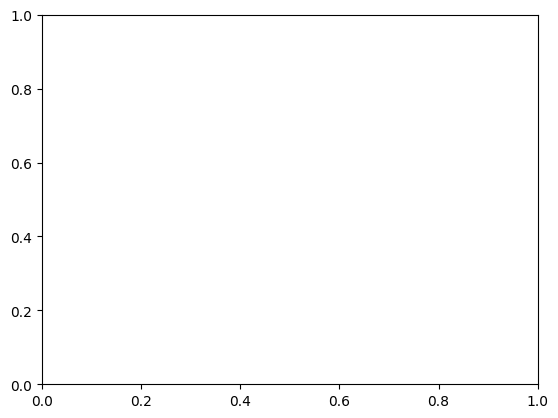

In [24]:
plt.bar(armed_df['race'], armed_df['date'])

TypeError: 'value' must be an instance of str or bytes, not a float

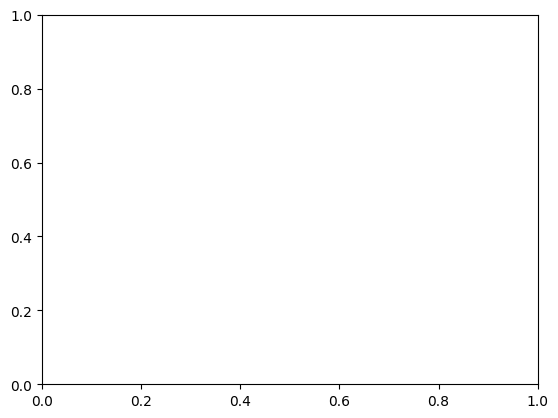

In [23]:
plt.bar(armed_df['race'], armed_df['name'])

In [32]:
shootings_df['date'] = pd.to_datetime(shootings_df['date'])  
shootings_df['year'] = shootings_df['date'].dt.year 
shootings_df

,date,armed_with,city,county,state,name,age,gender,race,agency_ids,year
id,,,,,,,,,,,
3,2015-01-02,gun,Shelton,Mason,WA,Tim Elliot,53.0,male,A,73,2015
4,2015-01-02,gun,Aloha,Washington,OR,Lewis Lee Lembke,47.0,male,W,70,2015
5,2015-01-03,unarmed,Wichita,Sedgwick,KS,John Paul Quintero,23.0,male,H,238,2015
8,2015-01-04,replica,San Francisco,San Francisco,CA,Matthew Hoffman,32.0,male,W,196,2015
9,2015-01-04,other,Evans,Weld,CO,Michael Rodriguez,39.0,male,H,473,2015
...,...,...,...,...,...,...,...,...,...,...,...
9147,2023-04-22,gun,Mesquite,Dallas,TX,NaN,NaN,male,NaN,NaN,2023
9149,2023-04-22,gun,West Jordan,Salt Lake,UT,NaN,NaN,male,NaN,751,2023
9144,2023-04-23,undetermined,Pineville,Rapides,LA,NaN,NaN,NaN,NaN,21677,2023


In [33]:
mn_shootings_year = shootings_df.loc[shootings_df['state'] == 'MN'] 
mn_shootings_year

,date,armed_with,city,county,state,name,age,gender,race,agency_ids,year
id,,,,,,,,,,,
49,2015-01-14,NaN,St. Paul,Ramsey,MN,Marcus Golden,24.0,male,B,63,2015
60,2015-01-15,gun,Bloomington,Hennepin,MN,Quincy Reed Reindl,24.0,male,W,139,2015
324,2015-01-26,gun,New Hope,Hennepin,MN,Raymond Kmetz,68.0,male,W,1953;109,2015
212,2015-03-16,gun,St. Paul,Ramsey,MN,Justin Tolkinen,28.0,male,W,63,2015
454,2015-05-08,NaN,Fridley,Anoka,MN,Sam Holmes,31.0,male,B,476,2015
...,...,...,...,...,...,...,...,...,...,...,...
8744,2022-12-15,knife,New Auburn,Sibley,MN,Brent A. Alsleben,34.0,male,NaN,896,2022
8947,2023-02-11,knife,St. Paul,Ramsey,MN,NaN,NaN,male,NaN,63,2023
8975,2023-02-24,knife,Duluth,St. Louis,MN,Zachary Shogren,34.0,male,NaN,2376,2023


In [35]:
il_shootings_year = shootings_df.loc[shootings_df['state'] == 'IL'] 
il_shootings_year

,date,armed_with,city,county,state,name,age,gender,race,agency_ids,year
id,,,,,,,,,,,
42,2015-01-11,gun,Arcola,Douglas,IL,Tommy Smith,39.0,male,W,290,2015
196,2015-03-02,gun,Joilet,Will,IL,Shaquille Barrow,20.0,male,B,244,2015
286,2015-04-02,gun,Rock Island,Rock Island,IL,Darrin Langford,32.0,male,B,40,2015
288,2015-04-02,gun,Metropolis,Massac,IL,Donald Hicks,63.0,male,W,41;42;43,2015
296,2015-04-04,gun,Zion,Lake,IL,Justus Howell,17.0,male,B,75,2015
...,...,...,...,...,...,...,...,...,...,...,...
8951,2023-02-08,undetermined,Chicago,Cook,IL,Isidro Valverde,21.0,male,NaN,265,2023
8954,2023-02-09,gun,Quincy,Adams,IL,Bradley S. Havermale,29.0,male,NaN,3706,2023
8960,2023-02-18,knife,Toulon,Stark,IL,Rodney G. Williams,66.0,male,NaN,13036,2023


In [38]:
mn_shootings_year.pivot(index="year", columns="city")

ValueError: Index contains duplicate entries, cannot reshape

<Axes: xlabel='id'>

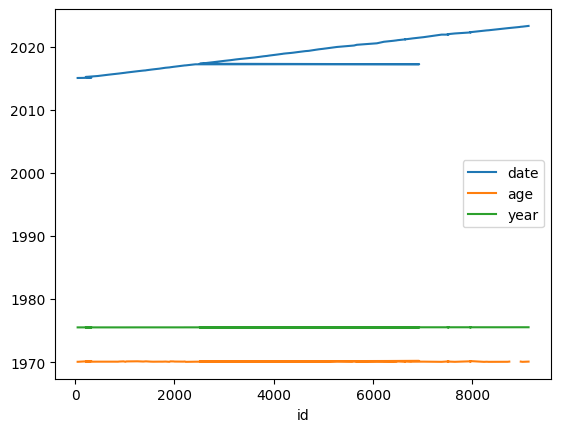

In [42]:
mn_shootings_year.plot()